# Lecture 4

**Authors:**
* Yilber Fabian Bautista
* Keiwan Jamaly

**Last date of modification:**
 November 28th 2021

Hello there, 

Welcome to Lecture 3 of this mini-lecture series on programing with Python. In this series, you will learn  basic and intermediate python tools that will be of great use in your scientific carer

**Objectives:** 

By the end of this lecture you will be able to:
* Understand the concept of solving differential equations
* solve differential equations using the scipy library's function **odeint**

# Theoretical background

Let's say, that you have a differential equation

\begin{equation*}
\dot{x}(t) = -x(t)
\end{equation*}

to compute $x(t+h)$ we can taylor expand around at $h=0$ for small $h$

\begin{equation*}
x(t+h) = x(t) + \dot{x}(t)*h
\end{equation*}

If we replace $\dot{x}(t)$ with $-x(t)$ from the differential equation we get
\begin{equation*}
x(t+h) = x(t) - x(t)*h
\end{equation*}

we can use this equation to compute a series of points for $x(t)$ for givin initial conditions. 

# Exercise 1

1. Compute solve the upper differential equation for $x(0)=1$ up to $t=1$ with $h=0.1$. 
2. Plot your result. 
3. Also compare the result with the analytical solution. 
4. What happens for different step sizes?

In [1]:
# Here goes your solution

What you have just done is called **Euler's method**. It can be generalized to any order of differential equations by reformulating the differential equation to

\begin{equation*}
y'(t) = f(t,y)
\end{equation*}

where $y'(t)$ is the derivative of $y(t)$.

y(t+h) can then be solved by solving 

\begin{equation*}
y(t+h) = y(t) + h*f(t,y) + \mathcal{O}(h^2)
\end{equation*}

To solve differential equations of higher order than one, we have to rewrite the differential of order $n$ as a system of $n$ first order differential equations. This step is crucial so we will do a step by step example. Let's say, we want to solve

\begin{equation*}
x''(t) = x'(t) + x(t)
\end{equation*}

we can use $\theta(x) = x'(t)$ to rewrite the equations in the following form:
\begin{align*}
x'(t) &= \theta(x) \\
\theta'(t) &= - \theta(t) - x(t)
\end{align*}

With this, we can rewrite the coupled differential equation to the form

\begin{align*}
y'(t) = f(t, y)
\end{align*}

where

$$
y(t) = 
\left(\begin{array}{cc} 
x(t) \\ 
\theta(t)
\end{array}\right)
$$ 

and
$$
f(t,y) = 
\left(\begin{array}{cc} 
\theta(t) \\
- \theta(t) - x(t)
\end{array}\right)
$$

## Runge-Kutta method
With the Euler method, you get only a first order approximation. For better approximations, we can use the Runge-Kutta method. Runge-Kutta second order works by computing

\begin{align*}
y(t+h) = y(t) + h*\frac{k_1}{6} + h*\frac{k_2}{3} + h*\frac{k_3}{3} + h*\frac{k_4}{6}
\end{align*}

where $k_1, k_2, k_3, k_4$ are 

\begin{align*}
k_1 &= f(t,y) \\
k_2 &= f(t+\frac{h}{2}, y + \frac{h}{2}*k_1) \\
k_3 &= f(t+\frac{h}{2}, y + \frac{h}{2}*k_2) \\
k_4 &= f(t+h, y + h*k_3)
\end{align*}

Runge-Kutta second order is just an example. [sipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) uses up to Runge-Kutte fifth order (This means a lot of equations). Luckily, this is already implemented. 

Before we do an example, there needs to be one more comment. Scipy uses Runge-Kutta 45 method. This means it calculates a Runge-Kutta 4 **and** Runge-Kutta 5 step and compares these two, to vary the step size to a given relative and absolute error. This is mostly done automatically, but it can be done manually. For more information read the [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) documentation.

To solve the upper differential equation, we first have to program function $f(t,y)$ that returns the derivative of $y$.

In [2]:
def f(t, y):
    x, theta = y
    dydy = [theta, -theta - x]
    return dydy

Then we need to run `sovle_ivp` to solve the differential equation.

```py
scipy.integrate.solve_ivp(fun, t_span, y0)
```

* fun: function that returns the derivative of $y$
* t_span: time span of the solution e.q. [0,10]
* y0: initial conditions e.q. [0, -1] (which stands for $x_0 = 0$ and $y_0 = -1$)

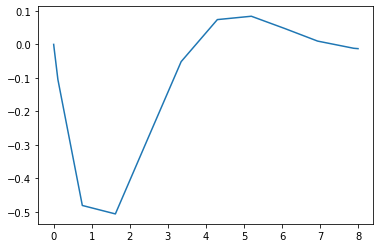

In [3]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

result = solve_ivp(f, [0, 8], [0, -1])

plt.plot(result.t, result.y[0], label='x')

As you can see, this look a little chunky. This is because solve_ivp only evaluates the points, where the solver calculates the needed steps size, if nothing more is specified. We have to specify the points, where we want to evaluate the solution. This can be done by using the `t_eval` argument.

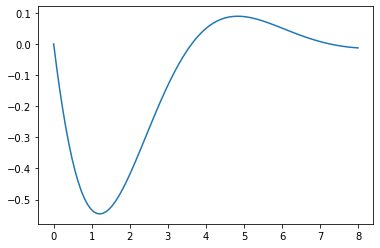

In [4]:
import numpy as np

t = np.linspace(0, 8, 100)

result = solve_ivp(f, [0, 8], [0, -1], t_eval=t)

plt.plot(result.t, result.y[0], label='x')

Let us promote another way to set up $f(t,y)$ and implement solve_ivp.

We already computed
$$
f(t,y) = 
\left(\begin{array}{cc} 
\theta(t) \\
- \theta(t) - x(t)
\end{array}\right)
$$

this can be rewritten as a matrix vector multiplication
$$
f(t,y) = 
\left(\begin{array}{cc} 
0 & 1 \\
-1 & -1
\end{array}\right)
*
y(t)
$$
With this, we can simplify the implementation of $f(t,y)$ to

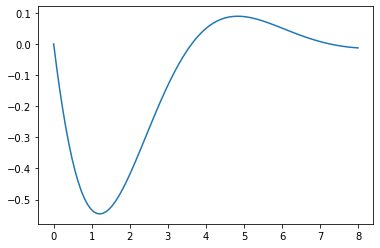

In [5]:
A = np.array([[0, 1], [-1, -1]])

def f(t, y):
    return A.dot(y)

t = np.linspace(0, 8, 100)

result = solve_ivp(f, [0, 8], [0, -1], t_eval=t)

plt.plot(result.t, result.y[0], label='x')

This matrix times vector split is not always possible, as you will see in the next exercise. 

# Exercise 2

We want to solve the mathematical pendulum without using the $sin(x) \approx x$ approximation.

\begin{align*}
\frac{d^2\theta(t)}{dt^2} &= - \frac{g}{l} * \sin(\theta(t))
\end{align*}

First, we want to absorb $g/l$ into the time, by defining $\tilde{t} = t \sqrt{g/l}$. Verify to yourself, that this results to

\begin{align*}
\frac{d^2\theta(\tilde{t})}{d\tilde{t}^2} &= - \sin(\theta(\tilde{t}))
\end{align*}

We have just made the differential equation dimensionless. Notice, that a change of $g$ or $l$ will result in a change of the time scale. 

1. Solve the dimensionless differential equation for $\theta(0) = \pi/4$ and $\dot{\theta}(0) = 0$. And plot your results. 
2. Calculate the period of the pendulum for $\phi \in [\pi/4, \pi/2]$. Here you can be creative for finding the period. And plot your results. 
3. Verify that $\theta(0) \rightarrow 0$, $T \rightarrow 2\pi \sqrt{l/g}$.

## Coupled differential equations

As a last example for Runge-Kutta, we want to solve the coupled differential equation. Let's imagine two frictionless point masses, connected by a spring which is relax at distance $d$. This system can be described by the following differential equation:

\begin{align*}
\frac{d^2x_1}{dt^2} + \omega^2 (x_1(t) - x_2(t) - d) &= 0 \\
\frac{d^2x_2}{dt^2} + \omega^2 (x_2(t) - x_1(t) + d) &= 0
\end{align*}

We write these two second order differential equations as 4 first order differential equations by defining $\theta_1 = x'_1$ and $\theta_2 = x'_2$:
\begin{align*}
x_1'(t) &= \theta_1(t) \\
x_2'(t) &= \theta_2(t) \\
\theta_1'(t) &= - \omega^2 (x_1(t) - x_2(t) - d) \\
\theta_2'(t) &= - \omega^2 (x_2(t) - x_1(t) + d)
\end{align*}

As you can see, this equation is an inhomogeneous system. To write it in the spirit of matrix times vector, we make $d$ time dependent and expand our system of equations to

\begin{align*}
x_1'(t) &= \theta_1(t) \\
x_2'(t) &= \theta_2(t) \\
\theta_1'(t) &= - \omega^2 (x_1(t) - x_2(t) - d(t)) \\
\theta_2'(t) &= - \omega^2 (x_2(t) - x_1(t) + d(t)) \\
d'(t) &= 0
\end{align*}

And absorb the value of $d$ into the initial conditions.

So we get for $f(t,y)$ and $y(t)$:
$$
y(t) = 
\left(\begin{array}{cc} 
x_1(t) \\ 
x_2(t) \\
\theta_1(t) \\
\theta_2(t) \\
d(t)
\end{array}\right)
$$ 

and
$$
f(t,y) = 
\left(\begin{array}{cccc} 
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
- \omega^2 & \omega^2 & 0 & 0 & \omega^2  \\
\omega^2 & -\omega^2 & 0 & 0 & -\omega^2  \\
0 & 0 & 0 & 0 & 0
\end{array}\right)
*
y(t)
$$

We solve the couple differential equations for $\omega = 1$, $d = 1$, $x_1(0) = d/2$, $x_2(0) = -d/2$, $x'_1(0) = 1$ and $x'_2(0) = 0$. 


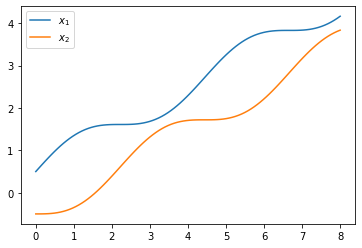

In [6]:
d = 1
omega = 1

B = np.array([[0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [-omega**2, omega**2, 0, 0, omega**2],
              [omega**2, -omega**2, 0, 0, -omega**2],
              [0, 0, 0, 0, 0]])

def f(t, y):
    return B.dot(y)

result = solve_ivp(f, [0, 8], [d/2, -d/2, 1, 0, d], t_eval=t)

plt.plot(result.t, result.y[0], label=r'$x_1$')
plt.plot(result.t, result.y[1], label=r'$x_2$')
plt.legend()

# Exercise 3

With this exercise, we put everything together, what we have learned so far. We imagine two frictionless point masses, which are connected by a spring. In contrast to previous example, the left point mass is also connected to a solid wall. The system is described by the following differential equation:

\begin{align*}
\frac{d^2x_1}{dt^2} + \omega_1^2 (x_1(t) - x_2(t) - d_1) + \omega_2^2 (x_1(t) - d_2) &= 0 \\
\frac{d^2x_2}{dt^2} + \omega_1^2 (x_2(t) - x_1(t) + d_1) &= 0
\end{align*}

Solve the these equations for $\omega_1 = 1$, $\omega_2 = 1$, $d_1 = 1$, $d_2 = 1$, $x_1(0) = d_1$, $x_2(0) = d_1 + d_2$, $x'_1(0) = 1$ and $x'_2(0) = 0$.

In [7]:
# your solution goes in here

# Solving differential equations by matrix inversion (optional)

Last, we want to study a nice method to solve differential equations, by inverting a matrix operator. 

We want to solve a boundary value problem for an electric potential. Two grounded infinite long metal plates and in the center a negatively charged plate. 

The potential is described by the following differential equation:
\begin{align*}
\frac{\partial ^2 \phi}{\partial x^2} = - \rho(x) = - \delta(x)
\end{align*}

We need to discretize this equation step by step with choosing $(x_0, \dots, x_i, \dots, x_{M = 2N + 1})$ as our lattice points, with $\phi_{M} = \phi_{-1} = 0$ and $h$ as the lattice spacing.

First, we start with the delta function.
We remember, that it needs to fulfill the following condition:

\begin{align*}
\int f(x) \delta(x) dx = f(0)
\end{align*}

By setting 
$$
\delta(x) \longrightarrow \frac{1}{h} \delta_{i, N}
$$
we can fulfill this condition.

Secondly, we discretize the derivative of the electric potential. This is easily done by using the formula for the second derivative of last lecture and using $\phi(x_i) = \phi_i$.
\begin{align*}
\frac{\partial ^2 \phi}{\partial x^2} \phi(x) \longrightarrow &\frac{\phi(x_i+h) -2\phi(x_i) + \phi(x_i-h)}{h^2} \\
&\frac{\phi_{i+1} -2\phi_i + \phi_{i-1}}{h^2} \\
&\sum_{j=1}^{N - 1}\frac{\delta_{j, i+1} -2\delta_{j,i} + \delta_{j, i-1}}{h^2} \phi_j
\end{align*}

All this can be rewritten into a Matrix Vector equation
\begin{align*}
M \vec{\phi} = 1/h \vec{\delta}
\end{align*}

where
\begin{align*}
D = \frac{\delta_{j, i+1} -2\delta_{j,i} + \delta_{j, i-1}}{h^2}
\end{align*}

The solution of $\phi_i$ is then given by
\begin{align*}
\vec{\phi} = \frac{1}{h} D^{-1} \vec{\delta}
\end{align*}

We go threw the code and explain in comments, what is happening. But you don't have to understand everything, this is just to prove, that this concept exists and it works. 

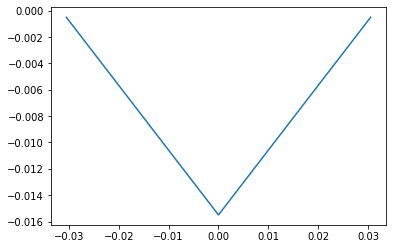

In [159]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import cg

N = 30
M = 2*N + 1
h = 0.001

L = M*h

# define a kroneker-delta function
def d(i,j):
    return 1 if i==j else 0

# calculate the nonzero entries of the matrix
row = []
col = []
data = []

for i in range(M):
    for j in range(M):
        value = d(j, (i+1)) - 2 * d(j, i) + d(j, (i-1))

        if value != 0:
            row.append(i)
            col.append(j)
            data.append(value/h**2)

row_array = np.array(row)
col_array = np.array(col)
data_array = np.array(data)

# implement a sparse matrix (a matrix which consists mostly of zero elements)
D = csc_matrix((data_array, (row_array, col_array)), shape=(M, M))

# define the right-hand side of the equation
delta_function = np.zeros(M)
delta_function[N] = +1/h

# use the conjugate gradient method to solve the equation
phi = cg(D, delta_function, x0=np.random.rand(M))[0]

# define the x-coordinates of the points
x = np.linspace(-L/2, L/2, M)

# plot the solution
plt.plot(x, phi)